<a href="https://colab.research.google.com/github/Sangeeth505/DEEP_LEARNING_PROJECT/blob/main/deep_learning_project_waste_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#We will classify the waste (among 2 Organic and recyclable) based on the image.
We have made a waste classification between organic or recyclable that can predict new waste images using CNN

#import all the required libraries -

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split


#DATA

In [ ]:
directory = "/content/drive/MyDrive/deep project/Waste_classification/Waste_classification/TRAIN"


In [ ]:
Name=[]
for file in os.listdir(directory):
    Name+=[file]
print(Name)
print(len(Name))

['.DS_Store', 'O', 'R']
3


In [ ]:
Name.remove('.DS_Store')
Name[0], Name[1] = Name[1], Name[0]
print(Name)


['R', 'O']


In [ ]:
waste_map = dict(zip(Name, [t for t in range(len(Name))]))
print(waste_map)
r_waste_map=dict(zip([t for t in range(len(Name))],Name)) 


{'R': 0, 'O': 1}


#Displaying some images from dataset¶


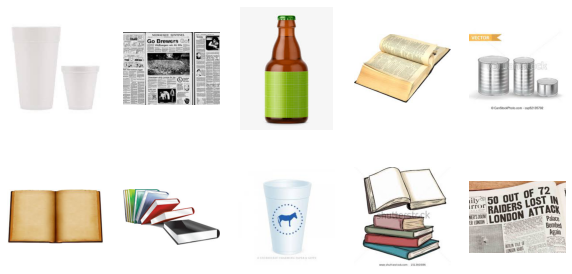

In [ ]:
waste = '/content/drive/MyDrive/deep project/Waste_classification/Waste_classification/TRAIN/R'
import os 
sub_class = os.listdir(waste)

fig = plt.figure(figsize=(10,5))
for e in range(len(sub_class[:10])):
    plt.subplot(2,5,e+1)
    img = plt.imread(os.path.join(waste,sub_class[e]))
    plt.imshow(img, cmap=plt.get_cmap('gray'))
    plt.axis('off')


In [ ]:
def mapper(value):
    return r_waste_map[value]

In [ ]:
img_datagen = ImageDataGenerator(rescale=1./255,
                                vertical_flip=True,
                                horizontal_flip=True,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                zoom_range=0.1,
                                validation_split=0.2)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

#Divide the training dataset into train set and validation set.


In [ ]:
train_generator = img_datagen.flow_from_directory(directory,
                                                 shuffle=True,
                                                 batch_size=32,
                                                 subset='training',
                                                 target_size=(100, 100))


Found 6416 images belonging to 2 classes.


In [ ]:
valid_generator = img_datagen.flow_from_directory(directory,
                                                 shuffle=True,
                                                 batch_size=16,
                                                 subset='validation',
                                                 target_size=(100, 100))


Found 1604 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten,Activation,BatchNormalization
from tensorflow.keras.models import model_from_json
from tensorflow.keras.models import load_model
from tensorflow.keras import regularizers


#Train a sequential model.


In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(100,100,3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0

In [ ]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
history = model.fit(train_generator, validation_data=valid_generator,batch_size= 64,epochs=5)


Epoch 1/5
201/201 [==============================] - 952s 5s/step - loss: 0.5096 - accuracy: 0.7573 - val_loss: 0.4708 - val_accuracy: 0.8117
Epoch 2/5
201/201 [==============================] - 38s 190ms/step - loss: 0.4182 - accuracy: 0.8201 - val_loss: 0.4486 - val_accuracy: 0.7924
Epoch 3/5
201/201 [==============================] - 38s 187ms/step - loss: 0.3836 - accuracy: 0.8427 - val_loss: 0.4214 - val_accuracy: 0.8117
Epoch 4/5
201/201 [==============================] - 38s 192ms/step - loss: 0.3714 - accuracy: 0.8513 - val_loss: 0.3811 - val_accuracy: 0.8466
Epoch 5/5
201/201 [==============================] - 40s 200ms/step - loss: 0.3574 - accuracy: 0.8530 - val_loss: 0.3349 - val_accuracy: 0.8603


#Plot Curves


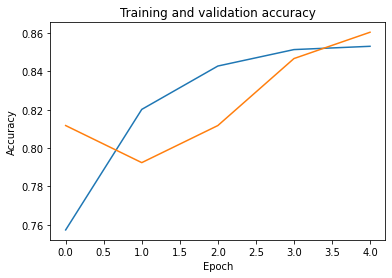

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.show()


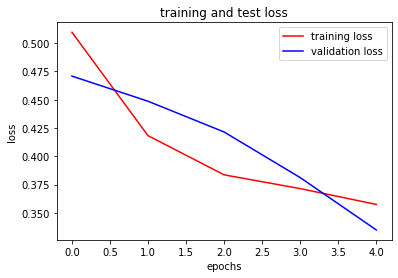

In [ ]:
training_accuracy = history.history['loss']
validation_accuracy = history.history['val_loss']
plt.plot(training_accuracy, 'r', label = 'training loss')
plt.plot(validation_accuracy, 'b', label = 'validation loss')
plt.title('training and test loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


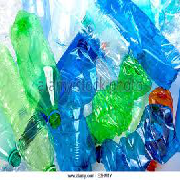

In [ ]:
from tensorflow.keras.preprocessing.image import load_img
load_img("/content/drive/MyDrive/deep project/Waste_classification/Waste_classification/TRAIN/R/R_100.jpg",target_size=(180,180))


In [ ]:
# from tensorflow.keras.models import load_img
from tensorflow.keras.preprocessing.image import load_img
load_img("/content/drive/MyDrive/deep project/Waste_classification/Waste_classification/TRAIN/R/R_100.jpg",target_size=(180,180))




prediction=model.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
print("Prediction is {}.".format(move_name))



1/1 [==============================] - 0s 14ms/step
Prediction is O.


#Randomly select an image from the test set and feed it to our model to make predictions.¶

In [ ]:

image=load_img("/content/drive/MyDrive/deep project/Waste_classification/Waste_classification/TRAIN/R/R_1009.jpg",target_size=(100,100))
#image=load_img("/content/R_10045.jpg",target_size=(100,100))

# image=img_to_array(image) 
# image=image/255.0
# prediction_image=np.array(image)
# prediction_image= np.expand_dims(image, axis=0)
prediction=model.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
print("Prediction is {}.".format(move_name))


1/1 [==============================] - 0s 58ms/step
Prediction is O.


In [ ]:


prediction=model.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
print("Prediction is {}.".format(move_name))


1/1 [==============================] - 0s 21ms/step
Prediction is R.


#Deep CC


In [ ]:
#model.save('saved_models/waste_detect.tf')

In [ ]:
#!deepCC 'saved_models/waste_detect.tf'